# Description

Runs gaussian mixture model on the pca version of the data.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

2

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=2
env: OPEN_BLAS_NUM_THREADS=2
env: NUMEXPR_NUM_THREADS=2
env: OMP_NUM_THREADS=2


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
np.random.seed(0)

In [6]:
INITIAL_RANDOM_STATE = 70000

## Input data

In [7]:
INPUT_SUBSET = "pca"

In [8]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [9]:
DR_OPTIONS = {
    "n_components": 50,
    "svd_solver": "full",
    "random_state": 0,
}

In [10]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/pca/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full.pkl')

'pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full'

## Clustering

In [11]:
from sklearn.mixture import GaussianMixture

In [12]:
CLUSTERING_ATTRIBUTES_TO_SAVE = ["n_clusters"]

In [13]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_MIN"] = 2
CLUSTERING_OPTIONS["K_MAX"] = 60  # sqrt(3749)
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["N_INIT"] = 10
CLUSTERING_OPTIONS["COVARIANCE_TYPE"] = "full"

display(CLUSTERING_OPTIONS)

{'K_MIN': 2,
 'K_MAX': 60,
 'N_REPS_PER_K': 5,
 'N_INIT': 10,
 'COVARIANCE_TYPE': 'full'}

In [14]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in range(CLUSTERING_OPTIONS["K_MIN"], CLUSTERING_OPTIONS["K_MAX"] + 1):
    for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
        clus = GaussianMixture(
            n_components=k,
            n_init=CLUSTERING_OPTIONS["N_INIT"],
            covariance_type=CLUSTERING_OPTIONS["COVARIANCE_TYPE"],
            random_state=random_state,
        )

        method_name = type(clus).__name__
        CLUSTERERS[f"{method_name} #{idx}"] = clus

        random_state = random_state + 1
        idx = idx + 1

In [15]:
display(len(CLUSTERERS))

295

In [16]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('GaussianMixture #0',
 GaussianMixture(n_components=2, n_init=10, random_state=70000))

('GaussianMixture #1',
 GaussianMixture(n_components=2, n_init=10, random_state=70001))

In [17]:
clustering_method_name = method_name
display(clustering_method_name)

'GaussianMixture'

## Output directory

In [18]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["CLUSTERING_RUNS_DIR"],
    f"{INPUT_SUBSET}-{INPUT_STEM}",
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/runs/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores')

# Load input file

In [19]:
data = pd.read_pickle(input_filepath)

In [20]:
data.shape

(3752, 50)

In [21]:
data.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
100001_raw-Food_weight,0.805216,-0.865390,0.699480,-0.065976,0.999617,-0.418645,1.993288,-0.346875,-1.522978,-2.382791,...,0.777932,0.507896,0.693668,1.024260,0.189606,-1.661826,0.281234,-0.096792,-0.339508,0.041431
100002_raw-Energy,0.588507,-1.491772,1.756340,-3.593295,2.100607,0.364910,1.254815,2.028484,-0.357607,-4.832726,...,-0.780215,-2.285033,-0.607663,-2.727018,1.711667,-0.535025,2.342068,0.197519,1.636996,-1.114410
100003_raw-Protein,1.910160,-1.873687,1.876677,-3.832557,1.240704,2.941375,2.293978,0.802473,0.665380,-4.375319,...,-0.547161,0.514721,0.034145,-0.423218,-0.324825,-0.000958,0.294579,1.186937,0.226722,0.169931
100004_raw-Fat,0.750799,-0.294733,1.317710,-1.346081,2.006403,0.533509,-0.752916,0.937515,-0.572191,-2.451612,...,0.060359,-0.878309,-0.774943,-1.914890,2.559763,1.547267,1.851110,-0.310431,3.495624,-1.595785
100005_raw-Carbohydrate,-0.530044,-0.007398,0.611418,-3.604094,2.227872,0.051271,0.001135,2.303819,-0.387759,-5.686184,...,-1.110273,-3.032541,-1.223873,-0.945626,2.150276,-1.798716,2.526678,0.716987,0.300972,-0.893854


In [22]:
assert not data.isna().any().any()

# Clustering

## Generate ensemble

In [23]:
from clustering.ensembles.utils import generate_ensemble

In [24]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=CLUSTERING_ATTRIBUTES_TO_SAVE,
)

  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 1/295 [00:00<03:46,  1.30it/s]

  1%|          | 2/295 [00:01<03:49,  1.28it/s]

  1%|          | 3/295 [00:02<03:55,  1.24it/s]

  1%|▏         | 4/295 [00:03<03:50,  1.26it/s]

  2%|▏         | 5/295 [00:03<03:48,  1.27it/s]

  2%|▏         | 6/295 [00:05<04:14,  1.13it/s]

  2%|▏         | 7/295 [00:06<04:20,  1.10it/s]

  3%|▎         | 8/295 [00:07<04:27,  1.07it/s]

  3%|▎         | 9/295 [00:08<04:32,  1.05it/s]

  3%|▎         | 10/295 [00:09<04:35,  1.03it/s]

  4%|▎         | 11/295 [00:13<09:01,  1.91s/it]

  4%|▍         | 12/295 [00:17<11:48,  2.50s/it]

  4%|▍         | 13/295 [00:19<12:16,  2.61s/it]

  5%|▍         | 14/295 [00:22<12:29,  2.67s/it]

  5%|▌         | 15/295 [00:25<12:28,  2.67s/it]

  5%|▌         | 16/295 [00:31<16:53,  3.63s/it]

  6%|▌         | 17/295 [00:35<18:08,  3.92s/it]

  6%|▌         | 18/295 [00:41<20:35,  4.46s/it]

  6%|▋         | 19/295 [00:46<21:51,  4.75s/it]

  7%|▋         | 20/295 [00:50<20:34,  4.49s/it]

  7%|▋         | 21/295 [00:57<22:59,  5.03s/it]

  7%|▋         | 22/295 [01:02<23:42,  5.21s/it]

  8%|▊         | 23/295 [01:08<24:40,  5.44s/it]

  8%|▊         | 24/295 [01:15<26:49,  5.94s/it]

  8%|▊         | 25/295 [01:23<28:31,  6.34s/it]

  9%|▉         | 26/295 [01:33<33:37,  7.50s/it]

  9%|▉         | 27/295 [01:42<35:16,  7.90s/it]

  9%|▉         | 28/295 [01:51<36:38,  8.23s/it]

 10%|▉         | 29/295 [01:59<36:11,  8.16s/it]

 10%|█         | 30/295 [02:06<35:31,  8.04s/it]

 11%|█         | 31/295 [02:14<35:20,  8.03s/it]

 11%|█         | 32/295 [02:23<35:34,  8.12s/it]

 11%|█         | 33/295 [02:31<36:09,  8.28s/it]

 12%|█▏        | 34/295 [02:41<38:06,  8.76s/it]

 12%|█▏        | 35/295 [02:52<40:28,  9.34s/it]

 12%|█▏        | 36/295 [03:06<46:04, 10.68s/it]

 13%|█▎        | 37/295 [03:16<45:35, 10.60s/it]

 13%|█▎        | 38/295 [03:28<46:50, 10.94s/it]

 13%|█▎        | 39/295 [03:39<46:19, 10.86s/it]

 14%|█▎        | 40/295 [03:51<48:12, 11.34s/it]

 14%|█▍        | 41/295 [04:06<53:03, 12.53s/it]

 14%|█▍        | 42/295 [04:20<53:45, 12.75s/it]

 15%|█▍        | 43/295 [04:32<53:11, 12.66s/it]

 15%|█▍        | 44/295 [04:44<52:15, 12.49s/it]

 15%|█▌        | 45/295 [05:00<55:40, 13.36s/it]

 16%|█▌        | 46/295 [05:15<58:01, 13.98s/it]

 16%|█▌        | 47/295 [05:31<59:44, 14.46s/it]

 16%|█▋        | 48/295 [05:45<59:36, 14.48s/it]

 17%|█▋        | 49/295 [06:01<1:01:13, 14.93s/it]

 17%|█▋        | 50/295 [06:15<59:58, 14.69s/it]  

 17%|█▋        | 51/295 [06:32<1:01:59, 15.24s/it]

 18%|█▊        | 52/295 [06:51<1:06:36, 16.44s/it]

 18%|█▊        | 53/295 [07:09<1:08:05, 16.88s/it]

 18%|█▊        | 54/295 [07:28<1:09:55, 17.41s/it]

 19%|█▊        | 55/295 [07:44<1:08:18, 17.08s/it]

 19%|█▉        | 56/295 [08:05<1:12:48, 18.28s/it]

 19%|█▉        | 57/295 [08:27<1:16:29, 19.28s/it]

 20%|█▉        | 58/295 [08:49<1:20:11, 20.30s/it]

 20%|██        | 59/295 [09:10<1:20:07, 20.37s/it]

 20%|██        | 60/295 [09:30<1:19:13, 20.23s/it]

 21%|██        | 61/295 [09:57<1:26:49, 22.26s/it]

 21%|██        | 62/295 [10:16<1:23:15, 21.44s/it]

 21%|██▏       | 63/295 [10:38<1:22:45, 21.40s/it]

 22%|██▏       | 64/295 [11:01<1:24:50, 22.04s/it]

 22%|██▏       | 65/295 [11:20<1:21:12, 21.18s/it]

 22%|██▏       | 66/295 [11:43<1:22:11, 21.54s/it]

 23%|██▎       | 67/295 [12:09<1:27:31, 23.03s/it]

 23%|██▎       | 68/295 [12:34<1:29:18, 23.60s/it]

 23%|██▎       | 69/295 [12:59<1:29:49, 23.85s/it]

 24%|██▎       | 70/295 [13:22<1:29:19, 23.82s/it]

 24%|██▍       | 71/295 [13:51<1:34:51, 25.41s/it]

 24%|██▍       | 72/295 [14:16<1:33:43, 25.22s/it]

 25%|██▍       | 73/295 [14:40<1:32:20, 24.96s/it]

 25%|██▌       | 74/295 [15:09<1:35:41, 25.98s/it]

 25%|██▌       | 75/295 [15:36<1:36:16, 26.26s/it]

 26%|██▌       | 76/295 [16:06<1:40:14, 27.47s/it]

 26%|██▌       | 77/295 [16:36<1:42:21, 28.17s/it]

 26%|██▋       | 78/295 [17:06<1:44:01, 28.76s/it]

 27%|██▋       | 79/295 [17:35<1:43:46, 28.82s/it]

 27%|██▋       | 80/295 [18:04<1:43:19, 28.84s/it]

 27%|██▋       | 81/295 [18:33<1:43:18, 28.97s/it]

 28%|██▊       | 82/295 [19:06<1:47:01, 30.15s/it]

 28%|██▊       | 83/295 [19:38<1:48:34, 30.73s/it]

 28%|██▊       | 84/295 [20:13<1:52:38, 32.03s/it]

 29%|██▉       | 85/295 [20:48<1:54:45, 32.79s/it]

 29%|██▉       | 86/295 [21:19<1:52:48, 32.38s/it]

 29%|██▉       | 87/295 [21:54<1:54:48, 33.12s/it]

 30%|██▉       | 88/295 [22:29<1:55:48, 33.57s/it]

 30%|███       | 89/295 [23:02<1:54:48, 33.44s/it]

 31%|███       | 90/295 [23:31<1:49:37, 32.08s/it]

 31%|███       | 91/295 [24:06<1:52:42, 33.15s/it]

 31%|███       | 92/295 [24:39<1:51:39, 33.00s/it]

 32%|███▏      | 93/295 [25:10<1:49:13, 32.44s/it]

 32%|███▏      | 94/295 [25:42<1:48:06, 32.27s/it]

 32%|███▏      | 95/295 [26:20<1:53:23, 34.02s/it]

 33%|███▎      | 96/295 [26:55<1:53:46, 34.30s/it]

 33%|███▎      | 97/295 [27:31<1:54:33, 34.71s/it]

 33%|███▎      | 98/295 [28:07<1:55:46, 35.26s/it]

 34%|███▎      | 99/295 [28:38<1:50:39, 33.87s/it]

 34%|███▍      | 100/295 [29:09<1:47:22, 33.04s/it]

 34%|███▍      | 101/295 [29:47<1:51:51, 34.60s/it]

 35%|███▍      | 102/295 [30:25<1:54:06, 35.48s/it]

 35%|███▍      | 103/295 [31:04<1:56:46, 36.49s/it]

 35%|███▌      | 104/295 [31:45<2:01:14, 38.08s/it]

 36%|███▌      | 105/295 [32:21<1:57:50, 37.21s/it]

 36%|███▌      | 106/295 [33:05<2:04:06, 39.40s/it]

 36%|███▋      | 107/295 [33:45<2:04:20, 39.68s/it]

 37%|███▋      | 108/295 [34:29<2:07:06, 40.78s/it]

 37%|███▋      | 109/295 [35:06<2:03:13, 39.75s/it]

 37%|███▋      | 110/295 [35:43<1:59:44, 38.84s/it]

 38%|███▊      | 111/295 [36:20<1:57:32, 38.33s/it]

 38%|███▊      | 112/295 [37:00<1:58:34, 38.88s/it]

 38%|███▊      | 113/295 [37:37<1:55:40, 38.13s/it]

 39%|███▊      | 114/295 [38:19<1:59:03, 39.47s/it]

 39%|███▉      | 115/295 [39:00<1:59:32, 39.85s/it]

 39%|███▉      | 116/295 [39:39<1:58:22, 39.68s/it]

 40%|███▉      | 117/295 [40:20<1:59:02, 40.13s/it]

 40%|████      | 118/295 [41:05<2:02:32, 41.54s/it]

 40%|████      | 119/295 [41:43<1:58:12, 40.30s/it]

 41%|████      | 120/295 [42:29<2:02:53, 42.13s/it]

 41%|████      | 121/295 [43:13<2:03:49, 42.70s/it]

 41%|████▏     | 122/295 [43:59<2:06:07, 43.74s/it]

 42%|████▏     | 123/295 [44:44<2:05:57, 43.94s/it]

 42%|████▏     | 124/295 [45:22<2:00:41, 42.35s/it]

 42%|████▏     | 125/295 [46:05<2:00:01, 42.36s/it]

 43%|████▎     | 126/295 [46:42<1:55:08, 40.88s/it]

 43%|████▎     | 127/295 [47:23<1:54:41, 40.96s/it]

 43%|████▎     | 128/295 [48:03<1:52:56, 40.58s/it]

 44%|████▎     | 129/295 [48:44<1:52:59, 40.84s/it]

 44%|████▍     | 130/295 [49:24<1:51:10, 40.43s/it]

 44%|████▍     | 131/295 [50:10<1:55:18, 42.18s/it]

 45%|████▍     | 132/295 [50:52<1:54:26, 42.13s/it]

 45%|████▌     | 133/295 [51:37<1:56:11, 43.04s/it]

 45%|████▌     | 134/295 [52:28<2:01:53, 45.43s/it]

 46%|████▌     | 135/295 [53:06<1:55:12, 43.20s/it]

 46%|████▌     | 136/295 [53:45<1:51:06, 41.93s/it]

 46%|████▋     | 137/295 [54:22<1:46:28, 40.44s/it]

 47%|████▋     | 138/295 [55:10<1:51:51, 42.75s/it]

 47%|████▋     | 139/295 [55:52<1:50:27, 42.49s/it]

 47%|████▋     | 140/295 [56:33<1:48:17, 41.92s/it]

 48%|████▊     | 141/295 [57:20<1:51:46, 43.55s/it]

 48%|████▊     | 142/295 [58:14<1:59:01, 46.67s/it]

 48%|████▊     | 143/295 [58:51<1:51:08, 43.87s/it]

 49%|████▉     | 144/295 [59:29<1:45:48, 42.04s/it]

 49%|████▉     | 145/295 [1:00:13<1:46:11, 42.48s/it]

 49%|████▉     | 146/295 [1:00:59<1:48:29, 43.69s/it]

 50%|████▉     | 147/295 [1:01:41<1:46:27, 43.16s/it]

 50%|█████     | 148/295 [1:02:24<1:45:20, 43.00s/it]

 51%|█████     | 149/295 [1:03:08<1:45:19, 43.28s/it]

 51%|█████     | 150/295 [1:03:51<1:44:36, 43.29s/it]

 51%|█████     | 151/295 [1:04:37<1:46:05, 44.21s/it]

 52%|█████▏    | 152/295 [1:05:25<1:47:49, 45.24s/it]

 52%|█████▏    | 153/295 [1:06:12<1:48:24, 45.80s/it]

 52%|█████▏    | 154/295 [1:06:53<1:44:16, 44.37s/it]

 53%|█████▎    | 155/295 [1:07:47<1:50:15, 47.25s/it]

 53%|█████▎    | 156/295 [1:08:38<1:51:56, 48.32s/it]

 53%|█████▎    | 157/295 [1:09:20<1:47:10, 46.60s/it]

 54%|█████▎    | 158/295 [1:10:05<1:45:01, 46.00s/it]

 54%|█████▍    | 159/295 [1:10:45<1:40:21, 44.27s/it]

 54%|█████▍    | 160/295 [1:11:26<1:36:56, 43.08s/it]

 55%|█████▍    | 161/295 [1:12:11<1:38:02, 43.90s/it]

 55%|█████▍    | 162/295 [1:12:53<1:35:51, 43.24s/it]

 55%|█████▌    | 163/295 [1:13:29<1:30:24, 41.10s/it]

 56%|█████▌    | 164/295 [1:14:13<1:31:44, 42.02s/it]

 56%|█████▌    | 165/295 [1:14:57<1:32:18, 42.60s/it]

 56%|█████▋    | 166/295 [1:15:40<1:31:48, 42.70s/it]

 57%|█████▋    | 167/295 [1:16:21<1:29:42, 42.05s/it]

 57%|█████▋    | 168/295 [1:17:04<1:29:27, 42.26s/it]

 57%|█████▋    | 169/295 [1:17:48<1:30:11, 42.95s/it]

 58%|█████▊    | 170/295 [1:18:29<1:28:23, 42.43s/it]

 58%|█████▊    | 171/295 [1:19:10<1:26:30, 41.86s/it]

 58%|█████▊    | 172/295 [1:19:54<1:26:57, 42.42s/it]

 59%|█████▊    | 173/295 [1:20:44<1:30:56, 44.73s/it]

 59%|█████▉    | 174/295 [1:21:28<1:29:52, 44.57s/it]

 59%|█████▉    | 175/295 [1:22:07<1:26:04, 43.04s/it]

 60%|█████▉    | 176/295 [1:22:51<1:25:48, 43.27s/it]

 60%|██████    | 177/295 [1:23:27<1:20:47, 41.08s/it]

 60%|██████    | 178/295 [1:24:15<1:24:21, 43.26s/it]

 61%|██████    | 179/295 [1:24:52<1:19:32, 41.14s/it]

 61%|██████    | 180/295 [1:25:40<1:22:55, 43.26s/it]

 61%|██████▏   | 181/295 [1:26:23<1:21:51, 43.08s/it]

 62%|██████▏   | 182/295 [1:27:08<1:22:28, 43.79s/it]

 62%|██████▏   | 183/295 [1:27:54<1:23:13, 44.58s/it]

 62%|██████▏   | 184/295 [1:28:40<1:23:14, 45.00s/it]

 63%|██████▎   | 185/295 [1:29:26<1:22:59, 45.26s/it]

 63%|██████▎   | 186/295 [1:30:13<1:22:48, 45.58s/it]

 63%|██████▎   | 187/295 [1:31:03<1:24:51, 47.14s/it]

 64%|██████▎   | 188/295 [1:31:47<1:22:02, 46.00s/it]

 64%|██████▍   | 189/295 [1:32:27<1:18:27, 44.41s/it]

 64%|██████▍   | 190/295 [1:33:07<1:15:21, 43.06s/it]

 65%|██████▍   | 191/295 [1:33:48<1:13:19, 42.30s/it]

 65%|██████▌   | 192/295 [1:34:28<1:11:28, 41.64s/it]

 65%|██████▌   | 193/295 [1:35:12<1:12:14, 42.49s/it]

 66%|██████▌   | 194/295 [1:35:53<1:10:35, 41.93s/it]

 66%|██████▌   | 195/295 [1:36:38<1:11:10, 42.70s/it]

 66%|██████▋   | 196/295 [1:37:19<1:10:00, 42.43s/it]

 67%|██████▋   | 197/295 [1:38:06<1:11:08, 43.56s/it]

 67%|██████▋   | 198/295 [1:38:48<1:09:54, 43.25s/it]

 67%|██████▋   | 199/295 [1:39:28<1:07:29, 42.18s/it]

 68%|██████▊   | 200/295 [1:40:07<1:05:13, 41.20s/it]

 68%|██████▊   | 201/295 [1:40:46<1:03:46, 40.71s/it]

 68%|██████▊   | 202/295 [1:41:28<1:03:39, 41.07s/it]

 69%|██████▉   | 203/295 [1:42:10<1:03:10, 41.20s/it]

 69%|██████▉   | 204/295 [1:42:52<1:03:06, 41.62s/it]

 69%|██████▉   | 205/295 [1:43:35<1:02:51, 41.90s/it]

 70%|██████▉   | 206/295 [1:44:13<1:00:24, 40.72s/it]

 70%|███████   | 207/295 [1:44:57<1:01:15, 41.77s/it]

 71%|███████   | 208/295 [1:45:42<1:01:46, 42.60s/it]

 71%|███████   | 209/295 [1:46:35<1:05:42, 45.85s/it]

 71%|███████   | 210/295 [1:47:24<1:06:19, 46.82s/it]

 72%|███████▏  | 211/295 [1:48:06<1:03:40, 45.48s/it]

 72%|███████▏  | 212/295 [1:48:52<1:02:51, 45.44s/it]

 72%|███████▏  | 213/295 [1:49:30<59:08, 43.27s/it]  

 73%|███████▎  | 214/295 [1:50:16<59:42, 44.23s/it]

 73%|███████▎  | 215/295 [1:50:58<57:43, 43.30s/it]

 73%|███████▎  | 216/295 [1:51:39<56:14, 42.72s/it]

 74%|███████▎  | 217/295 [1:52:25<56:44, 43.65s/it]

 74%|███████▍  | 218/295 [1:53:07<55:35, 43.32s/it]

 74%|███████▍  | 219/295 [1:53:58<57:30, 45.41s/it]

 75%|███████▍  | 220/295 [1:54:44<57:08, 45.72s/it]

 75%|███████▍  | 221/295 [1:55:25<54:42, 44.35s/it]

 75%|███████▌  | 222/295 [1:56:08<53:17, 43.80s/it]

 76%|███████▌  | 223/295 [1:56:51<52:32, 43.79s/it]

 76%|███████▌  | 224/295 [1:57:39<53:17, 45.04s/it]

 76%|███████▋  | 225/295 [1:58:30<54:32, 46.75s/it]

 77%|███████▋  | 226/295 [1:59:16<53:31, 46.54s/it]

 77%|███████▋  | 227/295 [1:59:58<51:15, 45.22s/it]

 77%|███████▋  | 228/295 [2:00:48<52:05, 46.65s/it]

 78%|███████▊  | 229/295 [2:01:30<49:44, 45.21s/it]

 78%|███████▊  | 230/295 [2:02:19<50:10, 46.32s/it]

 78%|███████▊  | 231/295 [2:03:05<49:08, 46.06s/it]

 79%|███████▊  | 232/295 [2:03:50<48:12, 45.91s/it]

 79%|███████▉  | 233/295 [2:04:36<47:35, 46.06s/it]

 79%|███████▉  | 234/295 [2:05:25<47:40, 46.89s/it]

 80%|███████▉  | 235/295 [2:06:12<46:41, 46.69s/it]

 80%|████████  | 236/295 [2:06:56<45:22, 46.14s/it]

 80%|████████  | 237/295 [2:07:41<44:13, 45.75s/it]

 81%|████████  | 238/295 [2:08:21<41:44, 43.94s/it]

 81%|████████  | 239/295 [2:09:01<39:52, 42.73s/it]

 81%|████████▏ | 240/295 [2:09:47<40:01, 43.66s/it]

 82%|████████▏ | 241/295 [2:10:30<39:03, 43.40s/it]

 82%|████████▏ | 242/295 [2:11:09<37:21, 42.29s/it]

 82%|████████▏ | 243/295 [2:11:48<35:41, 41.18s/it]

 83%|████████▎ | 244/295 [2:12:34<36:20, 42.75s/it]

 83%|████████▎ | 245/295 [2:13:21<36:37, 43.95s/it]

 83%|████████▎ | 246/295 [2:14:03<35:25, 43.39s/it]

 84%|████████▎ | 247/295 [2:14:47<34:50, 43.56s/it]

 84%|████████▍ | 248/295 [2:15:41<36:38, 46.78s/it]

 84%|████████▍ | 249/295 [2:16:23<34:46, 45.35s/it]

 85%|████████▍ | 250/295 [2:17:12<34:51, 46.48s/it]

 85%|████████▌ | 251/295 [2:18:02<34:51, 47.54s/it]

 85%|████████▌ | 252/295 [2:18:58<35:48, 49.97s/it]

 86%|████████▌ | 253/295 [2:19:51<35:41, 51.00s/it]

 86%|████████▌ | 254/295 [2:20:41<34:31, 50.53s/it]

 86%|████████▋ | 255/295 [2:21:29<33:14, 49.86s/it]

 87%|████████▋ | 256/295 [2:22:13<31:13, 48.03s/it]

 87%|████████▋ | 257/295 [2:22:59<30:02, 47.43s/it]

 87%|████████▋ | 258/295 [2:23:42<28:25, 46.10s/it]

 88%|████████▊ | 259/295 [2:24:26<27:14, 45.41s/it]

 88%|████████▊ | 260/295 [2:25:05<25:27, 43.64s/it]

 88%|████████▊ | 261/295 [2:25:43<23:46, 41.95s/it]

 89%|████████▉ | 262/295 [2:26:35<24:37, 44.76s/it]

 89%|████████▉ | 263/295 [2:27:20<23:53, 44.80s/it]

 89%|████████▉ | 264/295 [2:28:11<24:09, 46.76s/it]

 90%|████████▉ | 265/295 [2:28:53<22:40, 45.35s/it]

 90%|█████████ | 266/295 [2:29:46<23:00, 47.59s/it]

 91%|█████████ | 267/295 [2:30:30<21:48, 46.74s/it]

 91%|█████████ | 268/295 [2:31:22<21:41, 48.21s/it]

 91%|█████████ | 269/295 [2:32:12<21:08, 48.80s/it]

 92%|█████████▏| 270/295 [2:33:01<20:22, 48.89s/it]

 92%|█████████▏| 271/295 [2:33:45<18:52, 47.17s/it]

 92%|█████████▏| 272/295 [2:34:34<18:21, 47.88s/it]

 93%|█████████▎| 273/295 [2:35:22<17:32, 47.86s/it]

 93%|█████████▎| 274/295 [2:36:09<16:39, 47.58s/it]

 93%|█████████▎| 275/295 [2:37:01<16:16, 48.82s/it]

 94%|█████████▎| 276/295 [2:37:48<15:19, 48.41s/it]

 94%|█████████▍| 277/295 [2:38:26<13:36, 45.36s/it]

 94%|█████████▍| 278/295 [2:39:16<13:12, 46.63s/it]

 95%|█████████▍| 279/295 [2:40:09<12:58, 48.64s/it]

 95%|█████████▍| 280/295 [2:40:55<11:57, 47.82s/it]

 95%|█████████▌| 281/295 [2:41:41<11:00, 47.15s/it]

 96%|█████████▌| 282/295 [2:42:22<09:48, 45.30s/it]

 96%|█████████▌| 283/295 [2:43:06<09:01, 45.11s/it]

 96%|█████████▋| 284/295 [2:44:02<08:51, 48.32s/it]

 97%|█████████▋| 285/295 [2:44:56<08:18, 49.89s/it]

 97%|█████████▋| 286/295 [2:45:45<07:28, 49.85s/it]

 97%|█████████▋| 287/295 [2:46:26<06:15, 46.95s/it]

 98%|█████████▊| 288/295 [2:47:15<05:33, 47.68s/it]

 98%|█████████▊| 289/295 [2:48:16<05:10, 51.69s/it]

 98%|█████████▊| 290/295 [2:48:54<03:57, 47.57s/it]

 99%|█████████▊| 291/295 [2:49:44<03:13, 48.35s/it]

 99%|█████████▉| 292/295 [2:50:33<02:25, 48.40s/it]

 99%|█████████▉| 293/295 [2:51:18<01:34, 47.42s/it]

100%|█████████▉| 294/295 [2:52:08<00:48, 48.39s/it]

100%|██████████| 295/295 [2:52:59<00:00, 49.05s/it]

100%|██████████| 295/295 [2:52:59<00:00, 35.18s/it]

In [25]:
# the number should be close to 295 (the number of partitions generated by k-means/spectral clustering)
ensemble.shape

(295, 3)

In [26]:
ensemble.head()

,clusterer_params,partition,n_clusters
clusterer_id,,,
GaussianMixture #0,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #1,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
GaussianMixture #2,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
GaussianMixture #3,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #4,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


In [27]:
ensemble["n_clusters"].value_counts().head()

60    5
16    5
28    5
27    5
26    5
Name: n_clusters, dtype: int64

In [28]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    295.000000
mean      31.000000
std       17.058323
min        2.000000
25%       16.000000
50%       31.000000
75%       46.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [29]:
assert ensemble_stats["min"] > 1

In [30]:
assert not ensemble["n_clusters"].isna().any()

In [31]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [32]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [33]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

## Add clustering quality measures

In [34]:
from sklearn.metrics import calinski_harabasz_score

In [35]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [36]:
ensemble.shape

(295, 4)

In [37]:
ensemble.head()

,clusterer_params,partition,n_clusters,ch_score
clusterer_id,,,,
GaussianMixture #0,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,278.476403
GaussianMixture #1,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,278.476403
GaussianMixture #2,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,278.476403
GaussianMixture #3,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,278.476403
GaussianMixture #4,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,278.476403


## Save

In [38]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/runs/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/GaussianMixture-COVARIANCE_TYPE_full-K_MAX_60-K_MIN_2-N_INIT_10-N_REPS_PER_K_5.pkl')

In [39]:
ensemble.to_pickle(output_filename)

# Cluster quality

In [40]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters"]).mean()
    display(_df)

,ch_score
n_clusters,
2,278.476403
3,200.667293
4,179.351482
5,155.323108
6,138.372553
7,123.401594
8,118.244260
9,112.691002
10,103.846423


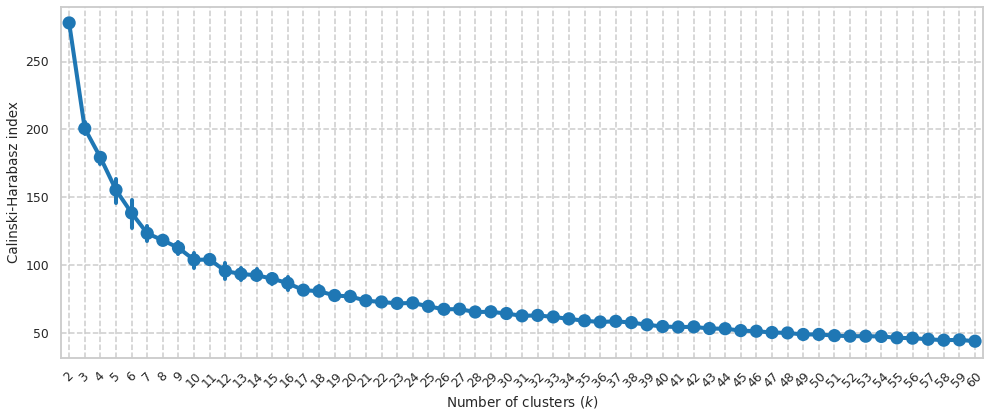

In [41]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [42]:
parts = ensemble.groupby("n_clusters").apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [43]:
parts.head()

n_clusters
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
4    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
5    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
6    [[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0,...
dtype: object

In [44]:
assert np.all(
    [
        parts.loc[k].shape == (CLUSTERING_OPTIONS["N_REPS_PER_K"], data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [45]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [46]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="k"
)

In [47]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

2     1.000000
4     0.959620
3     0.778499
5     0.753305
6     0.701395
9     0.646433
8     0.620193
7     0.618218
11    0.616767
14    0.562362
13    0.539311
12    0.507097
16    0.506780
10    0.451769
20    0.428028
Name: k, dtype: float64

In [48]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)

In [49]:
parts_ari_df.shape

(59, 10)

In [50]:
assert (
    int(
        (CLUSTERING_OPTIONS["N_REPS_PER_K"] * (CLUSTERING_OPTIONS["N_REPS_PER_K"] - 1))
        / 2
    )
    == parts_ari_df.shape[1]
)

In [51]:
parts_ari_df.head()

,0,1,2,3,4,5,6,7,8,9
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.959131,0.663488,1.000000,0.625019,0.689288,0.959131,0.649715,0.663488,0.950714,0.625019
4,0.999950,1.000000,0.977596,0.919106,0.999950,0.977601,0.919079,0.977596,0.919106,0.906216
5,0.922448,0.594431,0.947344,0.844701,0.602260,0.881898,0.815705,0.563410,0.501568,0.859284
6,0.932201,0.686367,0.682034,0.692429,0.671736,0.702504,0.712027,0.609077,0.585563,0.740012


## Save

In [52]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-stability-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/runs/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/GaussianMixture-stability-COVARIANCE_TYPE_full-K_MAX_60-K_MIN_2-N_INIT_10-N_REPS_PER_K_5.pkl')

In [53]:
parts_ari_df.to_pickle(output_filename)

## Stability plot

In [54]:
parts_ari_df_plot = (
    parts_ari_df.stack()
    .reset_index()
    .rename(columns={"level_0": "k", "level_1": "idx", 0: "ari"})
)

In [55]:
parts_ari_df_plot.dtypes

k        int64
idx      int64
ari    float64
dtype: object

In [56]:
parts_ari_df_plot.head()

,k,idx,ari
0,2,0,1.0
1,2,1,1.0
2,2,2,1.0
3,2,3,1.0
4,2,4,1.0


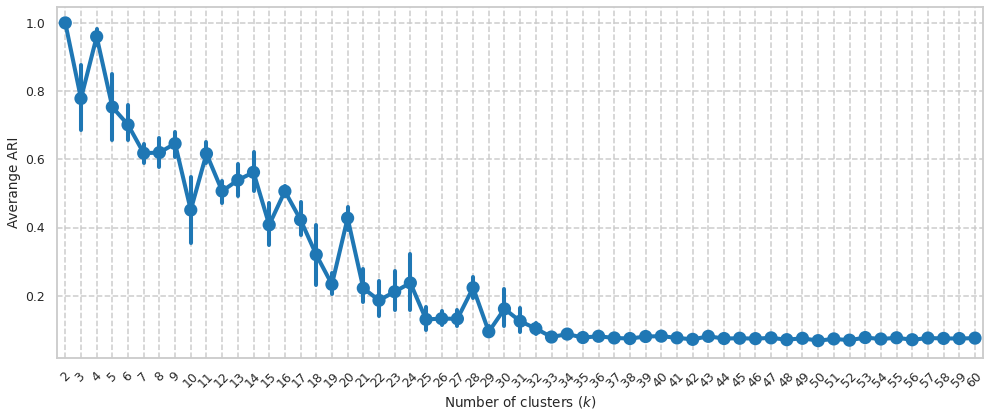

In [57]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="k", y="ari")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()